In [ ]:
!nvidia-smi


Sun Dec  1 15:03:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
df = pd.read_csv(csv_path)
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [ ]:
df_unseen = df[-12:]
df_copy = df[:-12]
df_copy

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420449,31.12.2016 07:10:00,1006.57,-6.20,266.46,-8.77,81.9,3.84,3.14,0.69,1.94,3.12,1311.94,0.37,0.68,244.6
420455,31.12.2016 08:10:00,1006.22,-6.84,265.85,-8.71,86.4,3.65,3.16,0.50,1.95,3.14,1314.62,0.95,1.90,181.1
420461,31.12.2016 09:10:00,1006.23,-6.31,266.37,-8.42,84.9,3.81,3.23,0.57,2.00,3.21,1312.01,1.28,1.84,180.6
420467,31.12.2016 10:10:00,1005.99,-5.02,267.68,-7.71,81.3,4.20,3.41,0.79,2.11,3.39,1305.30,0.99,1.88,187.7


In [ ]:
df_unseen

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420479,31.12.2016 12:10:00,1004.62,-0.71,272.09,-5.97,67.37,5.80,3.91,1.89,2.42,3.89,1282.65,1.06,2.08,202.9
420485,31.12.2016 13:10:00,1003.79,1.97,274.83,-4.38,62.63,7.04,4.41,2.63,2.74,4.39,1268.85,0.82,1.88,188.2
420491,31.12.2016 14:10:00,1003.25,4.15,277.05,-3.76,56.20,8.22,4.62,3.60,2.87,4.61,1258.09,0.58,1.32,231.0
420497,31.12.2016 15:10:00,1003.09,4.97,277.88,-3.04,56.03,8.71,4.88,3.83,3.03,4.86,1254.09,0.54,1.04,221.7
420503,31.12.2016 16:10:00,1002.54,2.44,275.40,-4.39,60.50,7.28,4.41,2.88,2.74,4.40,1265.12,0.46,1.08,177.2
420509,31.12.2016 17:10:00,1002.43,1.29,274.26,-4.63,64.53,6.71,4.33,2.38,2.69,4.32,1270.29,1.35,1.88,223.8
420515,31.12.2016 18:10:00,1002.27,-0.42,272.56,-4.92,71.50,5.92,4.23,1.69,2.63,4.22,1278.14,0.44,1.00,232.8
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [ ]:
df = df_copy

In [ ]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[-12:]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2016-12-31 00:10:00,31.12.2016 00:10:00,1008.64,-4.17,268.33,-5.36,91.4,4.48,4.09,0.39,2.53,4.06,1304.27,0.92,1.88,176.3
2016-12-31 01:10:00,31.12.2016 01:10:00,1008.05,-4.26,268.28,-6.37,85.1,4.45,3.79,0.66,2.34,3.76,1304.09,0.55,1.04,258.7
2016-12-31 02:10:00,31.12.2016 02:10:00,1007.52,-5.05,267.54,-6.28,91.0,4.19,3.82,0.38,2.36,3.79,1307.20,0.61,1.34,108.9
2016-12-31 03:10:00,31.12.2016 03:10:00,1007.35,-4.67,267.93,-6.56,86.5,4.32,3.73,0.58,2.31,3.71,1305.16,0.49,1.20,309.5
2016-12-31 04:10:00,31.12.2016 04:10:00,1006.95,-4.47,268.16,-7.77,77.6,4.38,3.40,0.98,2.10,3.38,1303.88,0.59,1.38,150.7
2016-12-31 05:10:00,31.12.2016 05:10:00,1006.71,-4.90,267.74,-8.64,74.9,4.24,3.17,1.06,1.96,3.15,1305.77,0.51,1.04,208.9
2016-12-31 06:10:00,31.12.2016 06:10:00,1006.59,-5.17,267.48,-9.31,72.5,4.15,3.01,1.14,1.86,2.99,1307.01,0.67,1.04,212.7
2016-12-31 07:10:00,31.12.2016 07:10:00,1006.57,-6.20,266.46,-8.77,81.9,3.84,3.14,0.69,1.94,3.12,1311.94,0.37,0.68,244.6
2016-12-31 08:10:00,31.12.2016 08:10:00,1006.22,-6.84,265.85,-8.71,86.4,3.65,3.16,0.50,1.95,3.14,1314.62,0.95,1.90,181.1


<Axes: xlabel='Date Time'>

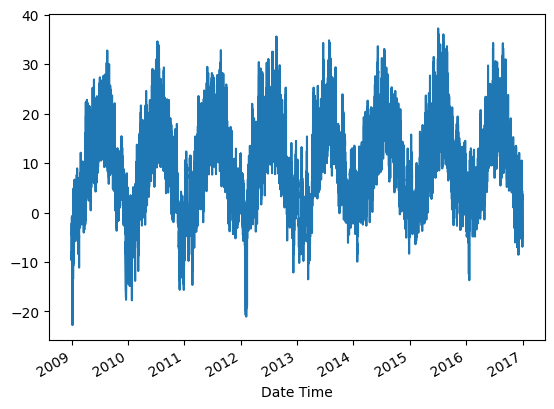

In [ ]:
temp = df['T (degC)']
temp.plot()

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70074, 5, 1), (70074,))

In [ ]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5074, 5, 1), (5074,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp1 = ModelCheckpoint('model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 78.4238 - root_mean_squared_error: 8.6495 - val_loss: 1.3425 - val_root_mean_squared_error: 1.1587
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.5471 - root_mean_squared_error: 1.8735 - val_loss: 0.6466 - val_root_mean_squared_error: 0.8041
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.1697 - root_mean_squared_error: 1.0803 - val_loss: 0.5464 - val_root_mean_squared_error: 0.7392
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.7962 - root_mean_squared_error: 0.8920 - val_loss: 0.5164 - val_root_mean_squared_error: 0.7186
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.7181 - root_mean_squared_error: 0.8473 - val_loss: 0.5145 - val_root_mean_squared_error: 0.7173
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6700 - root_mean_squared_error: 0.8185 - val_loss: 0.5310 - val_root_mean_squared_error: 0.7287
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.keras')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


,Train Predictions,Actuals
0,-9.979243,-9.67
1,-9.803786,-9.17
2,-8.934515,-8.10
3,-7.470774,-7.66
4,-7.276343,-7.04
...,...,...
59995,6.049953,6.07
59996,7.248885,9.88
59997,12.360926,13.53
59998,16.140030,15.43


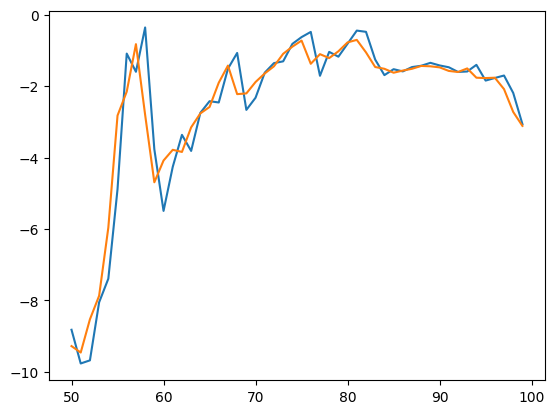

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Val Predictions,Actuals
0,15.499506,14.02
1,13.265978,13.67
2,13.081500,12.27
3,11.516277,11.19
4,10.451999,10.85
...,...,...
4995,17.285938,18.27
4996,17.284426,17.85
4997,17.177208,16.65
4998,15.856461,15.85


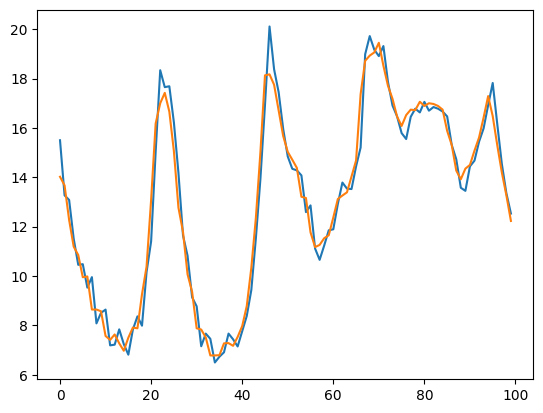

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Test Predictions,Actuals
0,14.396935,13.99
1,13.254275,13.46
2,12.902454,12.93
3,12.520532,12.43
4,12.097811,12.17
...,...,...
5069,-5.383907,-6.20
5070,-6.740007,-6.84
5071,-7.331250,-6.31
5072,-6.078473,-5.02


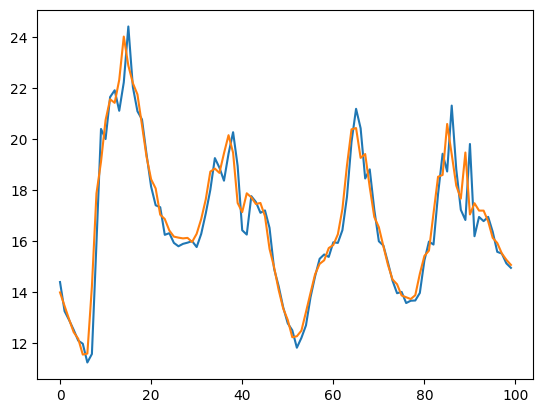

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

### Part 2

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end], label='Predictions')
  plt.plot(df['Actuals'][start:end], label='Actuals')
  plt.legend()
  return df, mse(y, predictions)


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(      Predictions  Actuals
 0       14.396935    13.99
 1       13.254275    13.46
 2       12.902454    12.93
 3       12.520532    12.43
 4       12.097811    12.17
 ...           ...      ...
 5069    -5.383907    -6.20
 5070    -6.740007    -6.84
 5071    -7.331250    -6.31
 5072    -6.078473    -5.02
 5073    -4.199713    -3.31
 
 [5074 rows x 2 columns],
 0.6299467030257255)

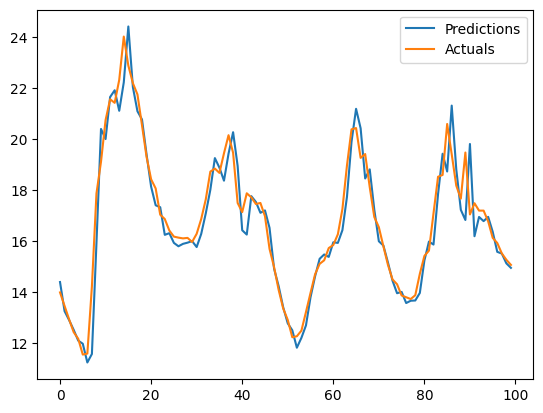

In [ ]:
plot_predictions1(model1, X_test1, y_test1)

## 1D CNN

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1))) #window size=5, variables=1 (temperature)
model2.add(Conv1D(64, kernel_size=2)) #sliding window, how many times do we want to slide this window (64),
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 4, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp2=ModelCheckpoint('model2.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 35.1939 - root_mean_squared_error: 5.4672 - val_loss: 1.5927 - val_root_mean_squared_error: 1.2620
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8228 - root_mean_squared_error: 1.3469 - val_loss: 0.7400 - val_root_mean_squared_error: 0.8602
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9294 - root_mean_squared_error: 0.9639 - val_loss: 0.5922 - val_root_mean_squared_error: 0.7696
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7573 - root_mean_squared_error: 0.8701 - val_loss: 0.5421 - val_root_mean_squared_error: 0.7362
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7194 - root_mean_squared_error: 0.8469 - val_loss: 0.5051 - val_root_mean_squared_error: 0.7107
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6941 - root_mean_squared_error: 0.8331 - val_loss: 0.5015 - val_root_mean_squared_error: 0.7081
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━

## GRU

In [ ]:
model3 = Sequential()
model3.add(InputLayer((5, 1))) #window size=5, variables=1 (temperature)
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,393 (52.32 KB)

 Trainable params: 13,393 (52.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp3=ModelCheckpoint('model3.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 80.6992 - root_mean_squared_error: 8.7688 - val_loss: 1.3329 - val_root_mean_squared_error: 1.1545
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 3.2070 - root_mean_squared_error: 1.7817 - val_loss: 0.7084 - val_root_mean_squared_error: 0.8417
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.1226 - root_mean_squared_error: 1.0583 - val_loss: 0.5444 - val_root_mean_squared_error: 0.7378
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7549 - root_mean_squared_error: 0.8688 - val_loss: 0.5054 - val_root_mean_squared_error: 0.7109
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.6832 - root_mean_squared_error: 0.8265 - val_loss: 0.5024 - val_root_mean_squared_error: 0.7088
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.6620 - root_mean_squared_error: 0.8136 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7014
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━

### Use other variables

In [ ]:
temp_df = pd.DataFrame({'Temperature': temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 07:10:00,-6.20,1.483168e+09
2016-12-31 08:10:00,-6.84,1.483172e+09
2016-12-31 09:10:00,-6.31,1.483175e+09


In [ ]:
day = 60*60*24                # Number of seconds in a day
year = 365.2425 * day         # Number of seconds in a year

temp_df['Day sin']  = np.sin(temp_df['Seconds'] * (2*np.pi / day))
temp_df['Day cos']  = np.cos(temp_df['Seconds'] * (2*np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2*np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2*np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [ ]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = [] #shape will be the number of training samples by the number of time steps that we are using times the number of variables that we are using
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70073, 6, 5), (70073,))

In [ ]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5073, 6, 5), (5073,))

In [ ]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std  = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [ ]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [ ]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp4 = ModelCheckpoint('model4.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 75.6657 - root_mean_squared_error: 8.3948 - val_loss: 3.5062 - val_root_mean_squared_error: 1.8725
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 4.6763 - root_mean_squared_error: 2.1566 - val_loss: 1.4655 - val_root_mean_squared_error: 1.2106
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.6450 - root_mean_squared_error: 1.2807 - val_loss: 0.8921 - val_root_mean_squared_error: 0.9445
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1.0178 - root_mean_squared_error: 1.0084 - val_loss: 0.6805 - val_root_mean_squared_error: 0.8249
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.7811 - root_mean_squared_error: 0.8837 - val_loss: 0.5458 - val_root_mean_squared_error: 0.7388
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6508 - root_mean_squared_error: 0.8067 - val_loss: 0.4964 - val_root_mean_squared_error: 0.7046
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(      Predictions  Actuals
 0       13.074038    13.46
 1       12.679173    12.93
 2       12.278037    12.43
 3       12.001741    12.17
 4       12.133981    11.55
 ...           ...      ...
 5068    -5.378210    -6.20
 5069    -6.387908    -6.84
 5070    -6.909807    -6.31
 5071    -6.034378    -5.02
 5072    -4.357378    -3.31
 
 [5073 rows x 2 columns],
 0.4879935779667693)

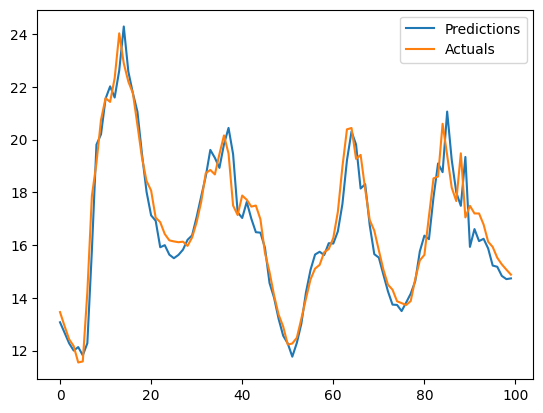

In [ ]:
plot_predictions1(model4, X2_test, y2_test)

## Add pressure to the dataframe

In [ ]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 07:10:00,1006.57,-6.20,0.953717,-0.300706,-0.001701,0.999999
2016-12-31 08:10:00,1006.22,-6.84,0.843391,-0.537300,-0.000984,1.000000
2016-12-31 09:10:00,1006.23,-6.31,0.675590,-0.737277,-0.000268,1.000000


In [ ]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = [] #shape will be the number of training samples by the number of time steps that we are using times the number of variables that we are using
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70072, 7, 6), (70072, 2))

In [ ]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5072, 7, 6), (5072, 2))

In [ ]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3  = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y




In [ ]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [ ]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 2.09262404, -1.84894511],
       [ 2.06352089, -1.69732346],
       [ 1.98955038, -1.49633661]])

In [ ]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,714 (73.10 KB)

 Trainable params: 18,714 (73.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp5 = ModelCheckpoint('model5.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.4520 - root_mean_squared_error: 0.6593 - val_loss: 0.0390 - val_root_mean_squared_error: 0.1974
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0284 - root_mean_squared_error: 0.1682 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0124 - root_mean_squared_error: 0.1111 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0867
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0093 - root_mean_squared_error: 0.0959 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0063 - root_mean_squared_error: 0.0796 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0681
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0052 - root_mean_squared_error: 0.0720 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0647
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end], mse(y, predictions)

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(    Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                  0.404879             0.412451             -0.784622   
 1                  0.357697             0.353683             -0.769033   
 2                  0.320850             0.323123             -0.734429   
 3                  0.328107             0.250251             -0.685553   
 4                  0.286486             0.254952             -0.605815   
 ..                      ...                  ...                   ...   
 95                 0.692704             0.716869             -0.414083   
 96                 0.653435             0.687485             -0.413162   
 97                 0.639713             0.663978             -0.394968   
 98                 0.642603             0.641646             -0.383892   
 99                 0.657321             0.653400             -0.375799   
 
     Pressure Actuals  
 0          -0.793439  
 1          -0.763123  
 2          -0.721893  
 3

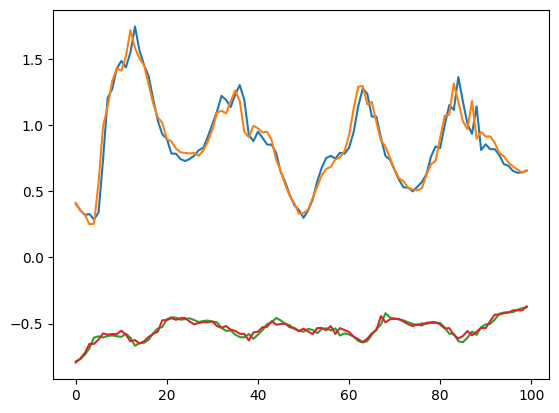

In [ ]:

plot_predictions2(model5, X3_test, y3_test)

In [ ]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [ ]:
def plot_predictions3(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end], mse(y, predictions)

In [ ]:
from tensorflow.keras.models import load_model

model5 = load_model('model5.keras')

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(    Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                 12.865582                12.93            982.502747   
 1                 12.464159                12.43            982.631287   
 2                 12.150658                12.17            982.916626   
 3                 12.212405                11.55            983.319702   
 4                 11.858290                11.59            983.977295   
 ..                      ...                  ...                   ...   
 95                15.314396                15.52            985.558411   
 96                14.980295                15.27            985.565979   
 97                14.863548                15.07            985.716003   
 98                14.888143                14.88            985.807373   
 99                15.013363                14.98            985.874084   
 
     Pressure Actuals  
 0             982.43  
 1             982.68  
 2             983.02  
 3

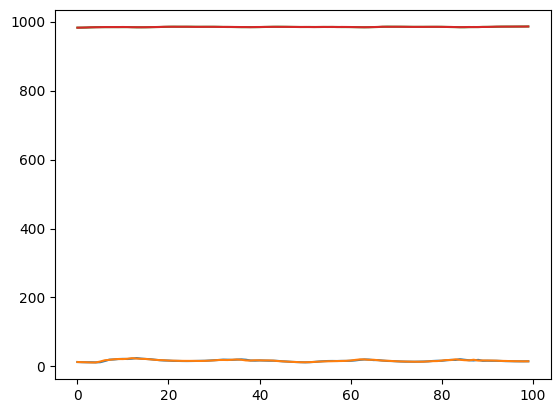

In [ ]:
plot_predictions3(model5, X3_test, y3_test)


In [ ]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))
model6.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 7, 32)               │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,362 (118.60 KB)

 Trainable params: 30,362 (118.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp6 = ModelCheckpoint('model6.keras', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3760 - root_mean_squared_error: 0.5869 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2117
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0425 - root_mean_squared_error: 0.2061 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1746
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0251 - root_mean_squared_error: 0.1581 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1101
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0090 - root_mean_squared_error: 0.0950 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0085 - root_mean_squared_error: 0.0921 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0766
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━

In [ ]:
time_steps = 7
current_input = X3_test[-1]
future_predictions = []

for _ in range(12):
  pred = model5.predict(current_input.reshape(1, time_steps, 6))
  future_predictions.append(pred[0])
  current_input = np.roll(current_input, -1, axis=0)
  current_input[-1, :2] = pred[0]
  # current_input[-1, 2:] = 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
future_predictions = np.array(future_predictions)

In [ ]:
postprocess_p(y3_test[:, 0])
postprocess_temp(y3_test[:, 1])

array([12.93, 12.43, 12.17, ..., -6.31, -5.02, -3.31])

In [ ]:
postprocess_temp(future_predictions[:, 1])
postprocess_p(future_predictions[:, 0])

array([1005.51855, 1005.66003, 1005.57587, 1005.4224 , 1005.2418 ,
       1005.02606, 1004.7351 , 1004.2926 , 1004.4574 , 1004.3879 ,
       1004.2455 , 1004.07043], dtype=float32)

In [ ]:
df_unseen.loc[:, 'Future p'] = postprocess_p(future_predictions[:, 0])
df_unseen.loc[:, 'Future temp'] = postprocess_temp(future_predictions[:, 1])

<ipython-input-66-ec2d6c61ad6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unseen.loc[:, 'Future p'] = postprocess_p(future_predictions[:, 0])
<ipython-input-66-ec2d6c61ad6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unseen.loc[:, 'Future temp'] = postprocess_temp(future_predictions[:, 1])


In [ ]:
df_unseen.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Future p,Future temp
420479,31.12.2016 12:10:00,1004.62,-0.71,272.09,-5.97,67.37,5.80,3.91,1.89,2.42,3.89,1282.65,1.06,2.08,202.9,1005.518555,-3.685545
420485,31.12.2016 13:10:00,1003.79,1.97,274.83,-4.38,62.63,7.04,4.41,2.63,2.74,4.39,1268.85,0.82,1.88,188.2,1005.660034,-4.559201
420491,31.12.2016 14:10:00,1003.25,4.15,277.05,-3.76,56.20,8.22,4.62,3.60,2.87,4.61,1258.09,0.58,1.32,231.0,1005.575867,-4.995020
420497,31.12.2016 15:10:00,1003.09,4.97,277.88,-3.04,56.03,8.71,4.88,3.83,3.03,4.86,1254.09,0.54,1.04,221.7,1005.422424,-4.937596
420503,31.12.2016 16:10:00,1002.54,2.44,275.40,-4.39,60.50,7.28,4.41,2.88,2.74,4.40,1265.12,0.46,1.08,177.2,1005.241821,-4.412657


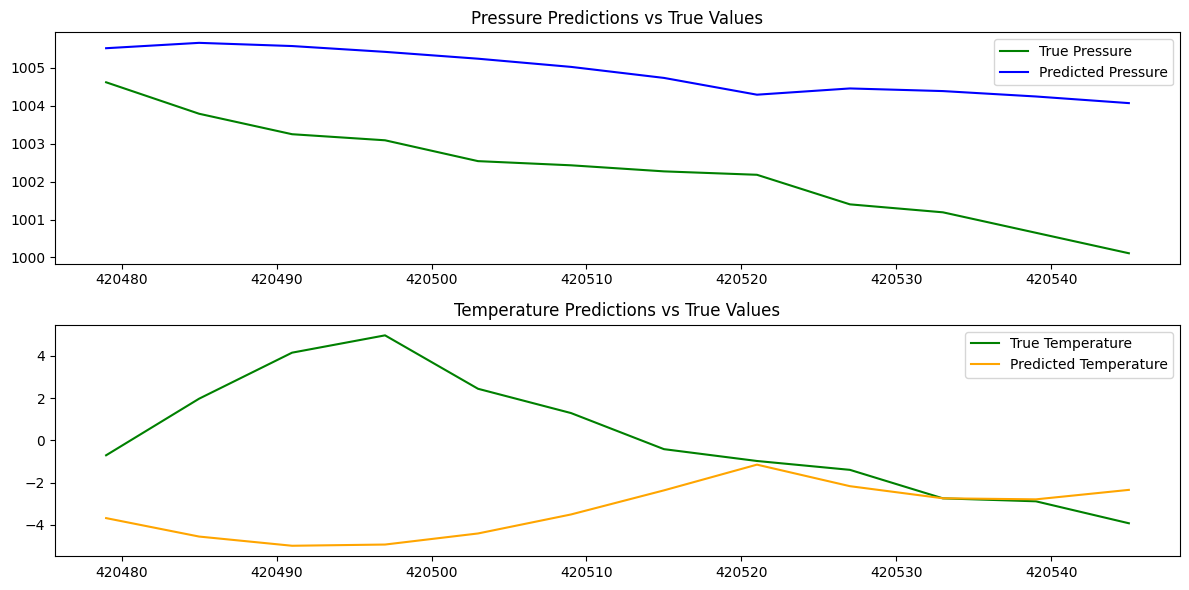

In [ ]:
# MODEL6
# Assuming you have true future values for both outputs
future_true = y3_test[-12:]  # The last 12 true values
plt.figure(figsize=(12, 6))

# Compare predictions and true values for pressure
plt.subplot(2, 1, 1)
# plt.plot(postprocess_p(future_true[:, 0]), label='True Pressure', color='green')
plt.plot(df_unseen.index, df_unseen['p (mbar)'], label='True Pressure', color='green')
plt.plot(df_unseen.index, df_unseen['Future p'], label='Predicted Pressure', color='blue')
plt.title('Pressure Predictions vs True Values')
plt.legend()

# Compare predictions and true values for temperature
plt.subplot(2, 1, 2)
plt.plot(df_unseen.index, df_unseen['T (degC)'], label='True Temperature', color='green')
plt.plot(df_unseen.index, df_unseen['Future temp'], label='Predicted Temperature', color='orange')
plt.title('Temperature Predictions vs True Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# MODEL 6
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate accuracy
temp_mae = mean_absolute_error(df_unseen['T (degC)'].values, df_unseen['Future temp'].values)
temp_rmse = np.sqrt(mean_squared_error(df_unseen['T (degC)'].values, df_unseen['Future temp'].values))
p_mae = mean_absolute_error(df_unseen['p (mbar)'].values, df_unseen['Future p'].values)
p_rmse = np.sqrt(mean_squared_error(df_unseen['p (mbar)'].values, df_unseen['Future p'].values))

print("Temperature Validation MAE:", temp_mae)
print("Temperature Validation RMSE:", temp_rmse)
print("Pressure Validation MAE:", p_mae)
print("Pressure Validation RMSE:", p_rmse)

temp_mae = mean_absolute_error(df_unseen['T (degC)'].iloc[0:1], df_unseen['Future temp'].iloc[0:1])
temp_rmse = np.sqrt(mean_squared_error(df_unseen['T (degC)'].iloc[0:1], df_unseen['Future temp'].iloc[0:1]))
p_mae = mean_absolute_error(df_unseen['p (mbar)'].iloc[0:1], df_unseen['Future p'].iloc[0:1])
p_rmse = np.sqrt(mean_squared_error(df_unseen['p (mbar)'].iloc[0:1], df_unseen['Future p'].iloc[0:1]))

print("Temperature Validation MAE:", temp_mae)
print("Temperature Validation RMSE:", temp_rmse)
print("Pressure Validation MAE:", p_mae)
print("Pressure Validation RMSE:", p_rmse)

Temperature Validation MAE: 3.7323621018727615
Temperature Validation RMSE: 5.084670351304866
Pressure Validation MAE: 2.5928055826823027
Pressure Validation RMSE: 2.7067840120474256
Temperature Validation MAE: 2.9755449676513672
Temperature Validation RMSE: 2.9755449676513672
Pressure Validation MAE: 0.8985546874999955
Pressure Validation RMSE: 0.8985546874999955


In [ ]:
df_unseen['T (degC)'].iloc[0]

-0.71

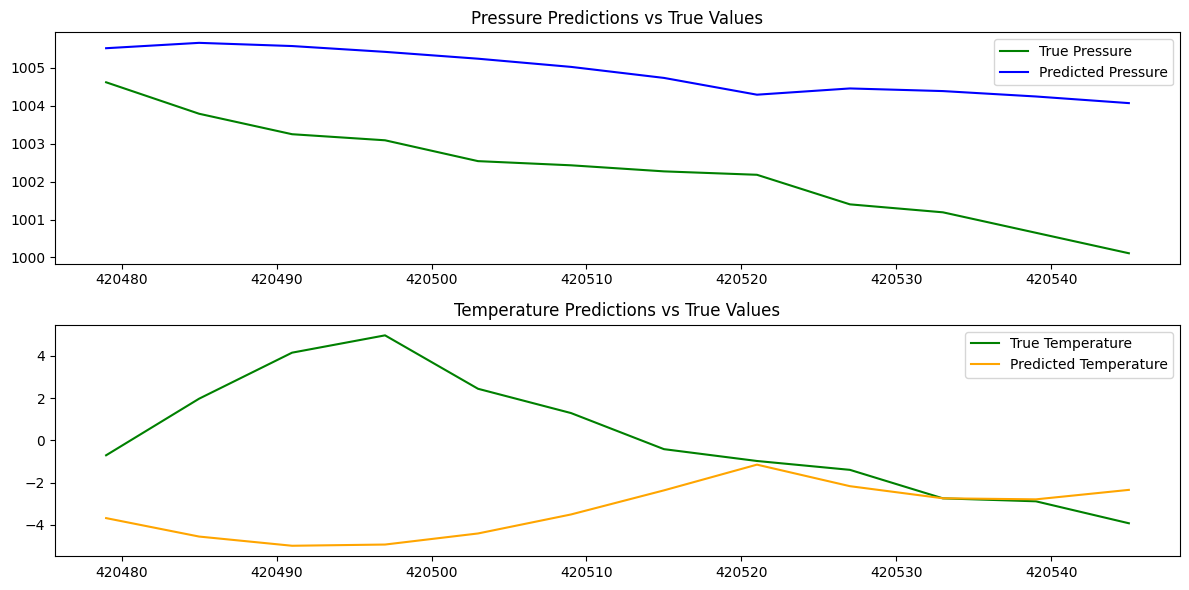

In [ ]:
# MODEL5
# Assuming you have true future values for both outputs
future_true = y3_test[-12:]  # The last 12 true values
plt.figure(figsize=(12, 6))

# Compare predictions and true values for pressure
plt.subplot(2, 1, 1)
# plt.plot(postprocess_p(future_true[:, 0]), label='True Pressure', color='green')
plt.plot(df_unseen.index, df_unseen['p (mbar)'], label='True Pressure', color='green')
plt.plot(df_unseen.index, df_unseen['Future p'], label='Predicted Pressure', color='blue')
plt.title('Pressure Predictions vs True Values')
plt.legend()

# Compare predictions and true values for temperature
plt.subplot(2, 1, 2)
plt.plot(df_unseen.index, df_unseen['T (degC)'], label='True Temperature', color='green')
plt.plot(df_unseen.index, df_unseen['Future temp'], label='Predicted Temperature', color='orange')
plt.title('Temperature Predictions vs True Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# MODEL 5
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate accuracy
temp_mae = mean_absolute_error(df_unseen['T (degC)'].values, df_unseen['Future temp'].values)
temp_rmse = np.sqrt(mean_squared_error(df_unseen['T (degC)'].values, df_unseen['Future temp'].values))
p_mae = mean_absolute_error(df_unseen['p (mbar)'].values, df_unseen['Future p'].values)
p_rmse = np.sqrt(mean_squared_error(df_unseen['p (mbar)'].values, df_unseen['Future p'].values))

print("Temperature Validation MAE:", temp_mae)
print("Temperature Validation RMSE:", temp_rmse)
print("Pressure Validation MAE:", p_mae)
print("Pressure Validation RMSE:", p_rmse)

temp_mae = mean_absolute_error(df_unseen['T (degC)'].iloc[0:1], df_unseen['Future temp'].iloc[0:1])
temp_rmse = np.sqrt(mean_squared_error(df_unseen['T (degC)'].iloc[0:1], df_unseen['Future temp'].iloc[0:1]))
p_mae = mean_absolute_error(df_unseen['p (mbar)'].iloc[0:1], df_unseen['Future p'].iloc[0:1])
p_rmse = np.sqrt(mean_squared_error(df_unseen['p (mbar)'].iloc[0:1], df_unseen['Future p'].iloc[0:1]))

print("Temperature Validation MAE:", temp_mae)
print("Temperature Validation RMSE:", temp_rmse)
print("Pressure Validation MAE:", p_mae)
print("Pressure Validation RMSE:", p_rmse)

Temperature Validation MAE: 3.7323621018727615
Temperature Validation RMSE: 5.084670351304866
Pressure Validation MAE: 2.5928055826823027
Pressure Validation RMSE: 2.7067840120474256
Temperature Validation MAE: 2.9755449676513672
Temperature Validation RMSE: 2.9755449676513672
Pressure Validation MAE: 0.8985546874999955
Pressure Validation RMSE: 0.8985546874999955


In [ ]:
for layer in model1.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}")
    print(f"Weights: {weights}")


Layer: lstm
Weights: [array([[ 0.21807013,  0.09259505,  0.00160775, -0.01305222, -0.03955199,
        -0.01077097, -0.05180101,  0.02820294,  0.05190913, -0.00485586,
         0.02343056, -0.10320269,  0.20913443,  0.03333427,  0.10450774,
         0.15489556,  0.0183499 ,  0.05404422, -0.04264138, -0.07301419,
         0.0572438 ,  0.07191576, -0.03440956,  0.05342314, -0.16949514,
        -0.05739178,  0.02488908,  0.01351049,  0.02250403,  0.08961473,
         0.16959156,  0.17239933, -0.04384299, -0.06042979, -0.00651469,
         0.1261422 ,  0.20863077,  0.17598833,  0.06285373,  0.07221378,
         0.18703917, -0.00337939,  0.25613767, -0.05737168, -0.15298593,
         0.11521204,  0.01335914,  0.03052935,  0.06391726, -0.02461802,
        -0.0503631 ,  0.25907212, -0.00449951,  0.09877201,  0.05489907,
         0.04178582, -0.0605221 , -0.14670132, -0.03430064, -0.04380992,
        -0.01494619,  0.09857817,  0.16604872,  0.09463791,  0.08815832,
         0.04602129,  0.01256

In [ ]:
dense_weights = model6.layers[-1].get_weights()  # Weights of the last Dense layer
print("Dense Layer Weights:", dense_weights)


Dense Layer Weights: [array([[ 0.11429983, -0.6177896 ],
       [-0.35063305,  0.3951332 ],
       [ 0.7905582 ,  0.56682134],
       [ 0.24861394,  0.11240609],
       [-0.620467  ,  0.15986675],
       [-0.14661464,  0.5733899 ],
       [-0.39467254,  0.04978398],
       [ 0.5228435 , -0.07684144]], dtype=float32), array([-0.02932492, -0.03393701], dtype=float32)]
